In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [1]:
import pandas as pd
df = pd.read_csv("mogi_tphcm_houses_cleaned_filtered_v2.csv")

# Display the first few rows
print(df.head())
df.info()

                                                Name  Price  \
0  Bán gấp Chính Chủ Cô Ngọc 162 Cao Thắng P11 Q1...  30 tỷ   
1  Bán nhà GÓC 2MT  đường Hai Bà Trưng, Phường Tâ...  30 tỷ   
2  Bán nhà MT Hai Bà Trưng Quận 1, dt: 6x25m, 5 t...  49 tỷ   
3  Bán biệt thự mặt tiền 204 Nguyễn Văn Hưởng Q2....  35 tỷ   
4  Bán nhà MT Nguyễn Đình Chiểu P5 Quận 3, dt: 6x...  40 tỷ   

                      Location  Bedrooms  Bathrooms  Area  Price_Numeric  \
0               Quận 10, TPHCM         2          2    85    30000000000   
1                Quận 1, TPHCM         6          6    38    30000000000   
2                Quận 1, TPHCM         4          4   150    49000000000   
3  Quận 2 (TP. Thủ Đức), TPHCM         6          3   160    35000000000   
4                Quận 3, TPHCM         6          6   110    40000000000   

   Price_per_m2  Distance_km_to_centre  Population     Price_USD  \
0  13793.499813               3.642138      368640  1.172447e+06   
1  30853.881161             

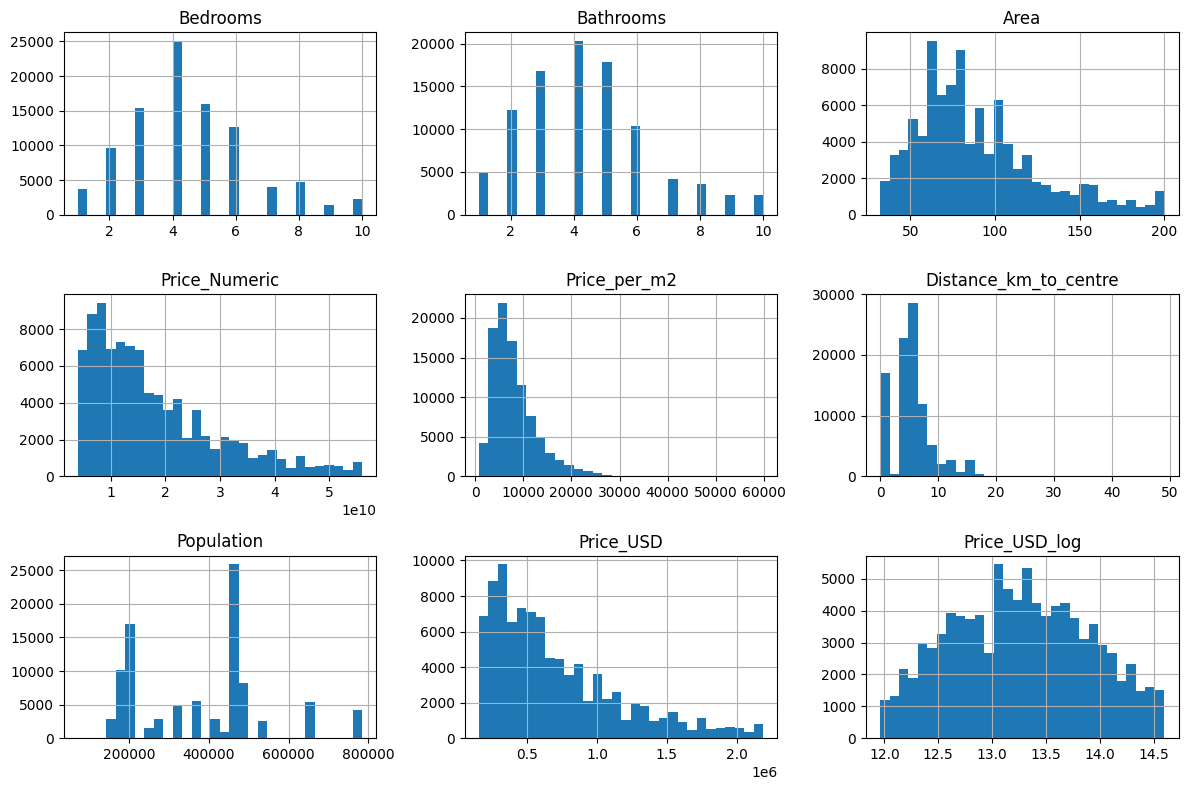

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot histograms for numerical features
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


In [47]:
df.describe()

,Bedrooms,Bathrooms,Area,Price_Numeric,Price_per_m2,Distance_km_to_centre,Population,Price_USD,Price_USD_log
count,55492.000000,55492.000000,55492.000000,5.549200e+04,55492.000000,55492.000000,55492.000000,55492.000000,55492.000000
mean,4.184081,4.000955,72.849816,1.105069e+10,6129.762556,6.062175,435788.120035,431878.295365,12.893669
std,1.705343,1.759591,21.340389,4.314232e+09,2266.499773,2.632872,165458.666781,168607.008171,0.416217
min,1.000000,1.000000,32.000000,4.000000e+09,1359.359402,0.000000,147168.000000,156326.331216,11.959707
25%,3.000000,3.000000,56.000000,7.450000e+09,4396.678065,3.834019,310178.000000,291157.791891,12.581624
50%,4.000000,4.000000,71.000000,1.050000e+10,5862.237421,6.289203,474792.000000,410356.619443,12.924784
75%,5.000000,5.000000,88.000000,1.450000e+10,7572.056668,7.148581,490620.000000,566682.950660,13.247557
max,10.000000,10.000000,125.000000,2.045000e+10,12493.292864,14.024251,784173.000000,799218.368344,13.591391


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

# Select features for X
X = df[["Bedrooms", "Bathrooms", "Area", "Distance_km_to_centre", "Population"]]
y = np.log1p(df["Price_USD"])# Apply log1p transformation to the target variable (Price_USD)

# Fit and transform the training data
X = scaler.fit_transform(X)

# Split data into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the learned weights (coefficients)
print("Coefficients (weights):", model.coef_)
print("Intercept (bias):", model.intercept_)


Coefficients (weights): [ 0.07169802  0.03911565  0.3200126  -0.29017224 -0.10433565]
Intercept (bias): 13.264395817291415


In [12]:
# Predict on test data
y_pred = model.predict(X_test)

# Inverse the log1p transformation to get the predicted and actual prices in the original scale
y_pred_exp = np.expm1(y_pred)  # Exponentiate to get the predicted price in original scale
y_test_exp = np.expm1(y_test)  # Exponentiate to get the actual price in original scale


In [13]:
# Calculate and print metrics on the original scale
print("R² Score on original scale:", r2_score(y_test_exp, y_pred_exp))
print("MAE on original scale:", mean_absolute_error(y_test_exp, y_pred_exp))
print("RMSE on original scale:", mean_squared_error(y_test_exp, y_pred_exp, squared=False))

R² Score on original scale: 0.5420941642854877
MAE on original scale: 211840.93833532574
RMSE on original scale: 309151.4633560801


In [14]:

# Calculate Mean Squared Error on the original scale
mse = mean_squared_error(y_test_exp, y_pred_exp)
print("Mean Squared Error on original scale:", mse)

Mean Squared Error on original scale: 95574627295.20573


In [15]:
# Show actual vs predicted values on the original scale
comparison = pd.DataFrame({"Actual": y_test_exp, "Predicted": y_pred_exp})
print(comparison)

              Actual      Predicted
76259  644846.116268  646275.991056
12382  351734.245237  829806.747307
36196  465070.835369  408921.300336
34153  273571.079629  314829.054395
29977  336101.612115  325806.789903
...              ...            ...
13168  977039.570103  884317.762357
10880  500244.259893  545145.315573
62090  566682.950660  498521.743208
54965  625305.324866  467250.859166
14354  586223.742062  515655.441875

[18964 rows x 2 columns]
